UAS Convolutional Neural Network

AlexNet

Identitas
Nama: Arya Dipataruna
NPM: 220712068
Study Buddy: Scikit-Learn
Topik Studi Kasus: Tomat

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import keras
import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout
from keras._tf_keras.keras.models import load_model


In [3]:
count = 0
dirs = os.listdir(r'C:\Users\Lenovo\Downloads\uas\foto\train_data')
for dir in dirs:
    files = list(os.listdir(r'C:\Users\Lenovo\Downloads\uas\foto\train_data/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

Matang Folder has 100 Images
Mentah Folder has 100 Images
Setengah Matang Folder has 100 Images
Images Folder has 300 Images


In [4]:
base_dir = r'C:\Users\Lenovo\Downloads\uas\foto\train_data'
img_size = 180
batch = 32
validation_split = 0.1
test_split = 0.1

In [5]:

dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
)

Found 300 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
print("Class Names:", class_names)

Class Names: ['Matang', 'Mentah', 'Setengah Matang']


In [7]:
total_count = len(dataset)
test_count = int(total_count * test_split)
val_count = int(total_count * validation_split)
train_count = total_count - val_count - test_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)
print("Test Images:", test_count)

Total Images: 10
Train Images: 8
Validation Images: 1
Test Images: 1


In [8]:
train_ds = dataset.take(train_count)
temp_ds = dataset.skip(train_count)
val_ds = temp_ds.take(val_count)
test_ds = temp_ds.skip(val_count)

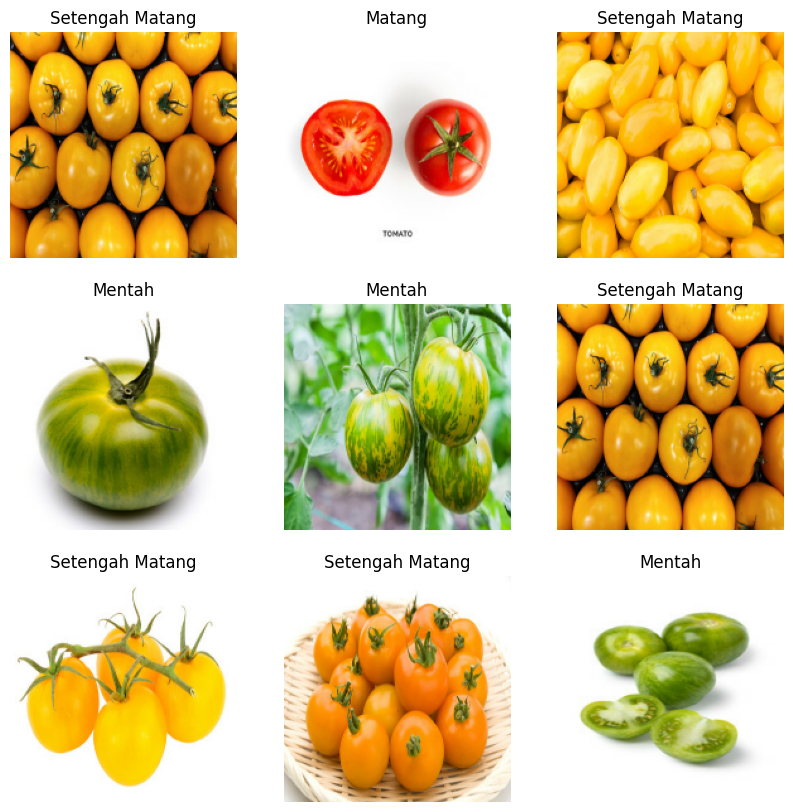

In [9]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [10]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


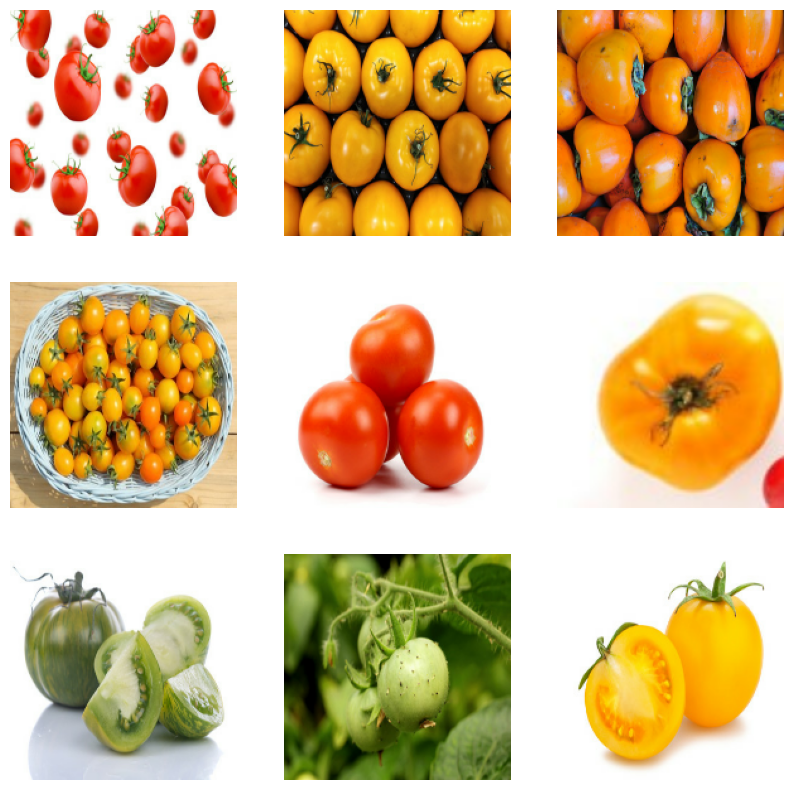

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming train_ds and val_ds are already defined and preprocessed

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)

# Define data augmentation layers
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Display some augmented images
i = 0
plt.figure(figsize=(10, 10))

# Show augmented images
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images[i:i+1])  # Augmenting a single image
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

plt.show()


In [15]:
import tensorflow as tf
import keras

import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout

from keras._tf_keras.keras.models import load_model

def alexnet(input_image):
    # Step 1: Input layer (224x224x3 image)
    x = preprocess(input_image)  # Normalize and resize image to 224x224x3

    # Step 2: Convolutional Layers
    x = conv_layer(x, 96, kernel_size=11, stride=4, activation=ReLU)
    x = max_pool(x, size=3, stride=2)
    
    x = conv_layer(x, 256, kernel_size=5, stride=1, activation=ReLU)
    x = max_pool(x, size=3, stride=2)
    
    x = conv_layer(x, 384, kernel_size=3, stride=1, activation=ReLU)
    x = conv_layer(x, 384, kernel_size=3, stride=1, activation=ReLU)
    x = conv_layer(x, 256, kernel_size=3, stride=1, activation=ReLU)
    x = max_pool(x, size=3, stride=2)

    # Step 3: Flatten
    x = flatten(x)

    # Step 4: Fully Connected Layers
    x = fc_layer(x, 4096, activation=ReLU)
    x = dropout(x, rate=0.5)  # Apply dropout

    x = fc_layer(x, 4096, activation=ReLU)
    x = dropout(x, rate=0.5)

    x = fc_layer(x, 1000, activation=Softmax)  # Output layer

    # Step 5: Output the predicted probabilities
    return x  # 1000-dimensional vector for classification probabilities


input_shape = (180, 180, 3)
n_classes = 3

K.clear_session()

model = vgg16(input_shape, n_classes)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    52,432,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,941,187 (320.21 MB)

 Trainable params: 83,941,187 (320.21 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.optimizers import Adam

# Compile the model
early_stoping = model.compile(
    optimizer=Adam(),  # You can use any optimizer (e.g., Adam, SGD, etc.)
    loss='sparse_categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']  # Metrics to track during training
)

# Fit the model with early stopping
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping]
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.3872 - loss: 1.1127 - val_accuracy: 0.3438 - val_loss: 1.0907
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.3897 - loss: 1.0416 - val_accuracy: 0.3438 - val_loss: 1.0355
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 6s/step - accuracy: 0.4224 - loss: 1.0422 - val_accuracy: 0.4062 - val_loss: 1.0576
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.4821 - loss: 0.9830 - val_accuracy: 0.7812 - val_loss: 0.6238
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.6288 - loss: 0.7057 - val_accuracy: 0.7812 - val_loss: 0.4064
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.6488 - loss: 0.5863 - val_accuracy: 0.7500 - val_loss: 0.4120
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.7237 - loss: 0.6125 - val_accuracy: 0.8125 - val_loss: 0.3868
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.7474 - loss: 0.5401 - val_accuracy: 0.6562 - val_loss: 0.3961
Epoch 9/

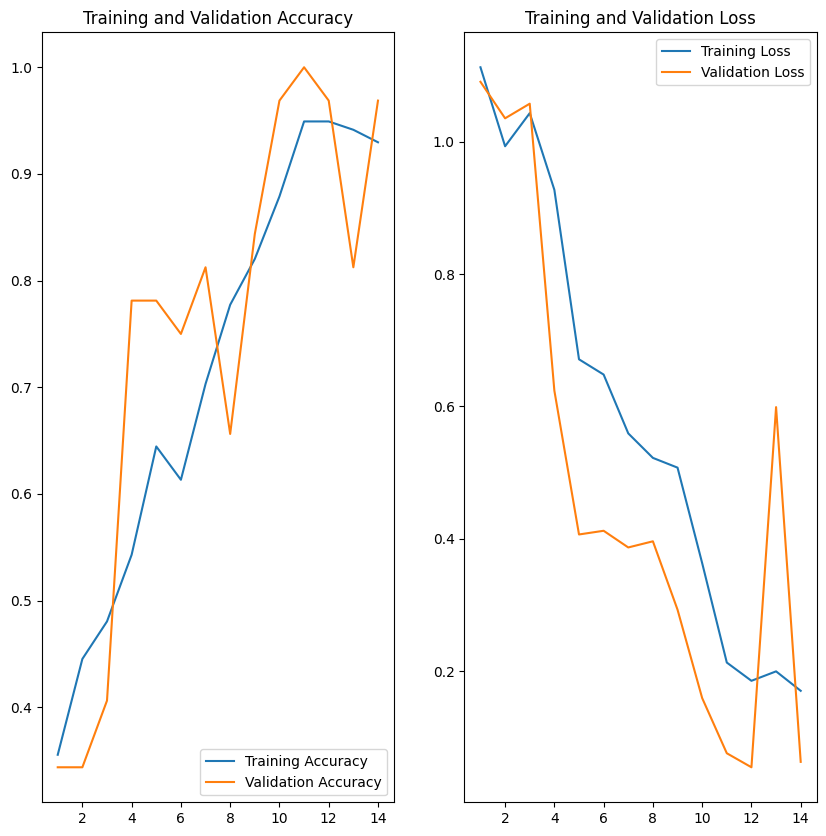

In [22]:
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
model.save('BestModel_AlexNet_Scikit-Learn.h5')

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

model = load_model(r'C:\Users\Lenovo\Downloads\uas\BestModel_AlexNet_Scikit-Learn.h5')
class_names = ['Matang', 'Mentah', 'Setengah Matang']

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r"C:\Users\Lenovo\Downloads\uas\foto\test_data\Mentah\hijau-test-9.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Prediksi: Mentah
Confidence: 56.91%
Prediksi: Mentah dengan confidence 56.91%. Gambar asli disimpan di predicted_image.jpg.


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


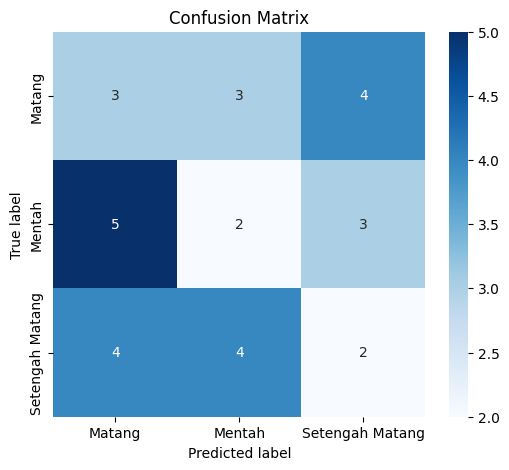

Confusion Matrix:
 [[3 3 4]
 [5 2 3]
 [4 4 2]]
Akurasi: 0.23333333333333334
Presisi: [0.25       0.22222222 0.22222222]
Recall: [0.3 0.2 0.2]
F1 Score: [0.27272727 0.21052632 0.21052632]


In [33]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

AlexNet_model = load_model(r'C:\Users\Lenovo\Downloads\uas\BestModel_AlexNet_Scikit-Learn.h5')

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Lenovo\Downloads\uas\foto\test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180)
)

y_pred = AlexNet_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Matang", "Mentah", "Setengah Matang"], yticklabels=["Matang", "Mentah", "Setengah Matang"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())